# SUNDAY 2 APRIL

['ping_sun_eve.csv', 'ping_sun_mor.csv', 'ping_sun_aft.csv']


,N.,Unit,From,IP,icmp_seq,TTL,RTT(ms)
260,64,bytes,apple.de,(17.253.144.10),266,128.0,136.0
264,64,bytes,brkgls.com,(17.253.144.10),270,128.0,120.0
259,64,bytes,seminars.apple.com,(17.253.144.10),265,128.0,90.2
263,64,bytes,apple.com.mx,(17.253.144.10),269,128.0,88.5
257,64,bytes,apple.com.pa,(17.253.144.10),263,128.0,41.2


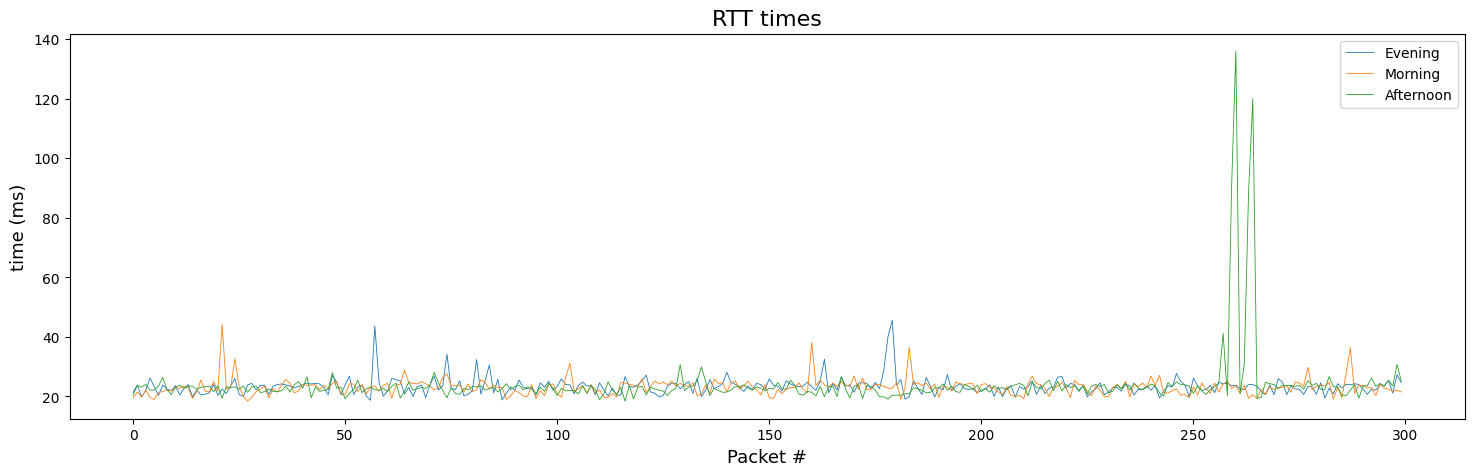

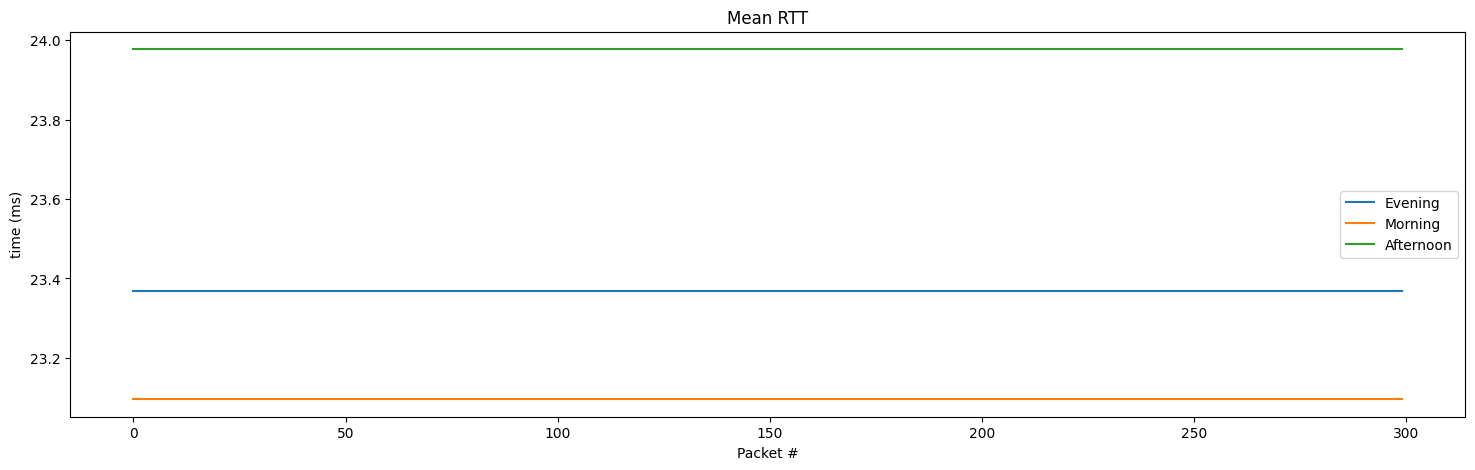

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def read_csv_dir(dirname, number_packets):
    list_time = []
    list_name = os.listdir(dirname)
    if '.DS_Store' in list_name:
        list_name.remove('.DS_Store')
    print(list_name)
    #list_name = list_name[1]
    for filename in list_name:
        df = pd.read_csv(dirname+'/'+filename, delimiter = ' ', engine='python')
        df = df.head(number_packets)
        #df = df.reset_index()
        df_times = df[df.columns[-1]].astype(float)
        list_time.append(df_times)
    return list_time, df

def plot_time(list_time, title):
    plt.figure(figsize=(18,5))
    for time in list_time:
        #print(time)
        plt.plot(time, '-', linewidth = 0.6)  
    plt.legend(['Evening', 'Morning', 'Afternoon'])
    plt.title(title, fontsize = 16)
    plt.xlabel('Packet #', fontsize = 13)
    plt.ylabel('time (ms)', rotation = 90, fontsize = 13)

def plot_mean(list_time, number_packets):
    plt.figure(figsize=(18,5))
    for time in list_time:
        mean = time.mean()
        mean_list = [mean] * number_packets
        plt.plot(mean_list)
    plt.legend(['Evening', 'Morning', 'Afternoon'])
    plt.title('Mean RTT')
    plt.xlabel('Packet #')
    plt.ylabel('time (ms)', rotation = 90)

dirname = 'April_2/ping'
number_packets = 300
title = 'RTT times'

list_time, df = read_csv_dir(dirname, number_packets)
plot_time(list_time, title)

plot_mean(list_time, number_packets)

df.nlargest(5, columns='RTT(ms)')

In [2]:
def n_largest_rtt(dirname, n):
    list_name = os.listdir(dirname)
    df_largest = pd.DataFrame({})
    if '.DS_Store' in list_name:
        list_name.remove('.DS_Store')
    print(list_name)
    for filename in list_name:
        df_ping = pd.read_csv(dirname + '/' + filename, delimiter = ' ')
        df_ping = df_ping.head(300)
        df_ping = pd.concat([df_ping['From'], df_ping['RTT(ms)'].astype(float)], axis = 1)
        df_ping_grouped = df_ping.groupby('From').mean()
        df_largest_rtt = df_ping_grouped.nlargest(n, 'RTT(ms)').reset_index()
        df_largest = pd.concat([df_largest, df_largest_rtt], axis = 1)
    return df_largest

dirname = 'April_2/ping'
largest_rtt = n_largest_rtt(dirname, 8)
print(largest_rtt)

def intersect_hostnames(largest_rtt, number_occs):
    col1 = largest_rtt.iloc[:,0]
    col2 = largest_rtt.iloc[:,2]
    col3 = largest_rtt.iloc[:,4]
    
    col12 = np.intersect1d(col1.values, col2.values)
    col13 = np.intersect1d(col1.values, col3.values)
    col23 = np.intersect1d(col2.values, col3.values)
    tmp = np.union1d(col12, col13)
    col_union = np.union1d(tmp, col23)
    
    if number_occs == 2:
        return col_union
    else:
        col4 = np.intersect1d(col1.values, col2.values)
        col5 = np.intersect1d(col4, col3.values)
        return col5
    
late_hostname = intersect_hostnames(largest_rtt, 2)
late_hostname


#TAKE THOSE PRESENT IN 2/3 OF CASES
#TRACEROUTE EACH OF THEM 10 TIMES
#AVERAGE RTT THE COMMON ROUTE (OR BY HOPS)
#BAR PLOT FOR HOPS
#REPORT THE HOSTNAME FOR THAT HOPS (AMONG THEM COULD BE AN ISSUE)

#ONLY AT THE END SHOW RESULTS FROM CAFFARO


['ping_sun_eve.csv', 'ping_sun_mor.csv', 'ping_sun_aft.csv']
              From    RTT(ms)               From    RTT(ms)  \
0  guide.apple.com  25.900000     www.brkgls.com  26.633333   
1       icloud.com  25.800000       apple.com.lk  25.720000   
2  shake.apple.com  25.633333        apple.co.uk  25.225000   
3     apple.com.co  24.545455         brkgls.com  24.700000   
4     apple.com.uy  24.500000    shake.apple.com  24.483333   
5      apple.co.uk  24.333333  podcast.apple.com  24.350000   
6   asia.apple.com  24.300000           apple.ca  23.940000   
7         apple.nl  24.133333          apple.com  23.937500   

                    From    RTT(ms)  
0               apple.de  38.857143  
1             brkgls.com  36.571429  
2           apple.com.mx  31.542857  
3     seminars.apple.com  30.311111  
4            apple.co.uk  25.133333  
5  applescript.apple.com  24.575000  
6               apple.it  24.500000  
7           apple.com.pa  24.400000  


array(['apple.co.uk', 'brkgls.com', 'shake.apple.com'], dtype=object)

['trace_sun_mor1.csv', 'trace_sun_aft1.csv', 'trace_sun_eve1.csv']


/tmp/ipykernel_4093/2524518260.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  trace = pd.read_csv(dirname+'/'+filename, delimiter = '  ')
/tmp/ipykernel_4093/2524518260.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  packet_time = trace.mean(axis = 1)
/tmp/ipykernel_4093/2524518260.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  trace = pd.read_csv(dirname+'/'+filename, delimiter = '  ')
/tmp/ipykernel_4093/2524518260.py:1

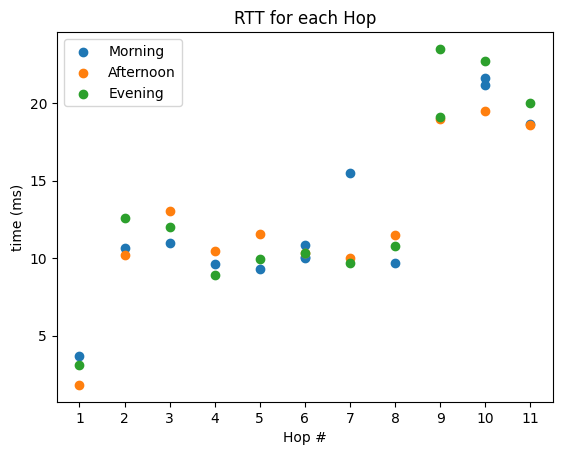

In [3]:
def read_csv_dir_trace(dirname):
    list_name = os.listdir(dirname)
    if '.DS_Store' in list_name:
        list_name.remove('.DS_Store')
    print(list_name)
    #list_name = list_name[1]
    for filename in list_name:
        trace = pd.read_csv(dirname+'/'+filename, delimiter = '  ')
        #trace = trace.head(14)
        cols = trace.columns
        for col in cols[2:]:
            trace[col] = trace[col].astype(float)
        trace[cols[0]] = trace[cols[0]].astype(str)
        packet_time = trace.mean(axis = 1)
        df_new = pd.concat([trace['Hop'], packet_time], axis = 1)  
        plt.scatter(df_new['Hop'], df_new[0])
        plt.title('RTT for each Hop')
        plt.ylabel('time (ms)', rotation = 90)
        plt.xlabel('Hop #')
        plt.legend(['Morning', 'Afternoon', 'Evening'])

dirname = 'April_2/trace'
read_csv_dir_trace(dirname)

['ping_sun_eve.csv', 'ping_sun_mor.csv', 'ping_sun_aft.csv']


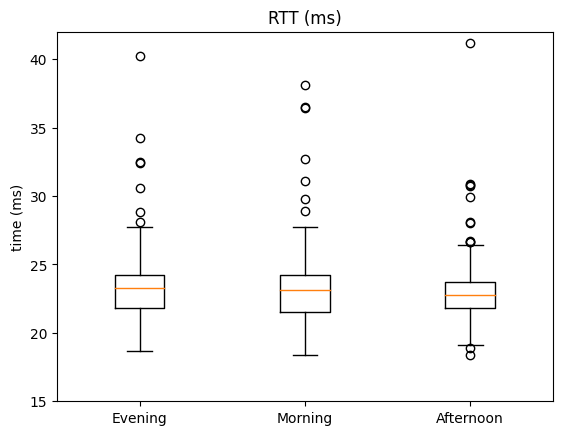

In [4]:
def boxplot_ping_dir(dirname):
    list_name = os.listdir(dirname)
    if '.DS_Store' in list_name:
        list_name.remove('.DS_Store')
    print(list_name)
    times = pd.DataFrame({})
    for filename in list_name:
        ping = pd.read_csv(dirname+'/'+filename, delimiter = ' ')
        ping = ping.head(300)
        times  = pd.concat([times, ping['RTT(ms)']], axis = 1)
    times = times.astype(float)
    plt.boxplot(times, labels=['Evening', 'Morning', 'Afternoon'])
    plt.title('RTT (ms)')
    plt.ylabel('time (ms)', rotation = 90)
    plt.ylim(top=42)
    plt.ylim(bottom=15)

dirname = 'April_2/ping'
times = boxplot_ping_dir(dirname)

# MONDAY 3 APRIL

['ping_mon_aft.csv', 'ping_mon_mor.csv', 'ping_mon_eve.csv']


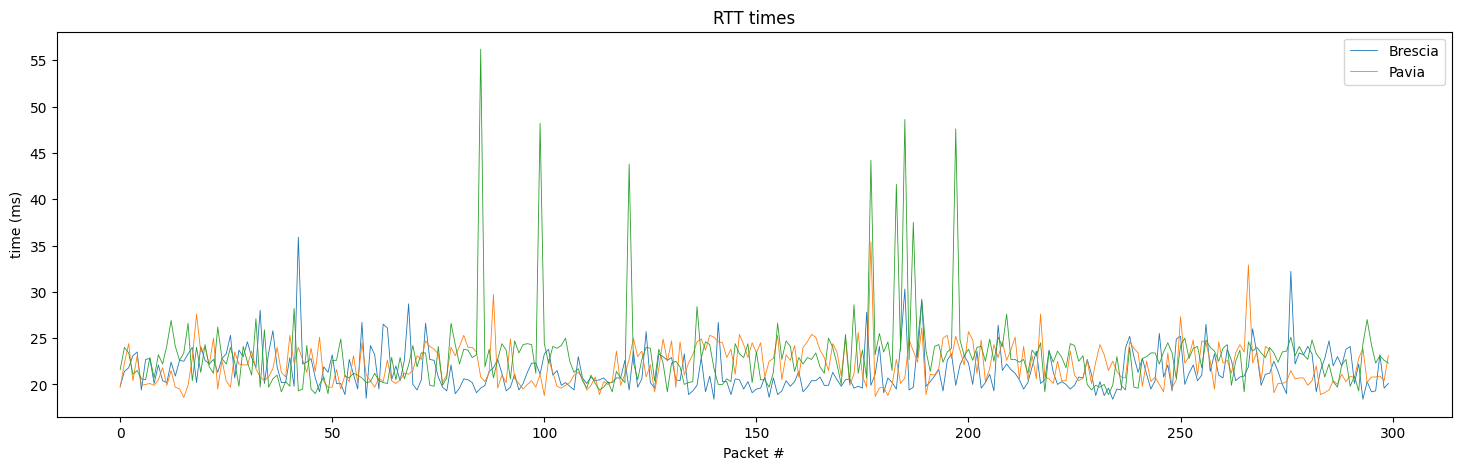

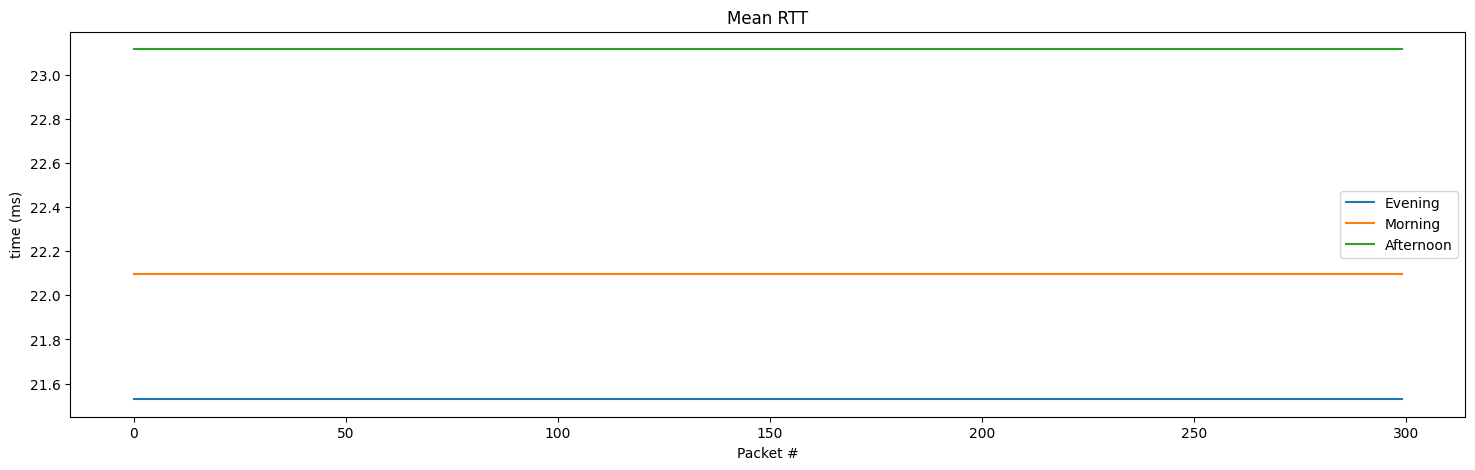

In [60]:
dirname = 'April_3/ping'
number_packets = 300
title = 'RTT times'

list_time, df = read_csv_dir(dirname, number_packets)
plot_time(list_time, title)

plot_mean(list_time, number_packets)

In [6]:
dirname = 'April_3/ping'
largest_rtt = n_largest_rtt(dirname, 8)
largest_rtt

['ping_mon_aft.csv', 'ping_mon_mor.csv', 'ping_mon_eve.csv']


,From,RTT(ms),From,RTT(ms),From,RTT(ms)
0,apple.com.uy,24.120000,apple.ca,24.357143,iphone.apple.com,34.250000
1,apple.com.lk,24.100000,aperturetrialbuy.apple.com,24.162500,www.brkgls.com,32.860000
2,guide.apple.com,24.050000,apple.co.uk,24.150000,asia.apple.com,30.700000
3,firewire.apple.com,23.166667,livepage.apple.com,23.680000,apple.com.sg,29.320000
4,shake.apple.com,22.822222,apple.com.do,23.000000,apple.com,24.783333
5,itunespartner.apple.com,22.711111,apple.com.py,23.000000,seminars.apple.com,24.520000
6,apple.com.bo,22.571429,apple.com.pe,22.935714,guide.apple.com,24.233333
7,apple.nl,22.440000,seminars.apple.com,22.837500,apple.com.uy,24.130000


['trace_mon_aft1.csv', 'trace_mon_eve1.csv', 'trace_mon_mor1.csv']


/tmp/ipykernel_4093/2524518260.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  trace = pd.read_csv(dirname+'/'+filename, delimiter = '  ')
/tmp/ipykernel_4093/2524518260.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  packet_time = trace.mean(axis = 1)
/tmp/ipykernel_4093/2524518260.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  trace = pd.read_csv(dirname+'/'+filename, delimiter = '  ')
/tmp/ipykernel_4093/2524518260.py:1

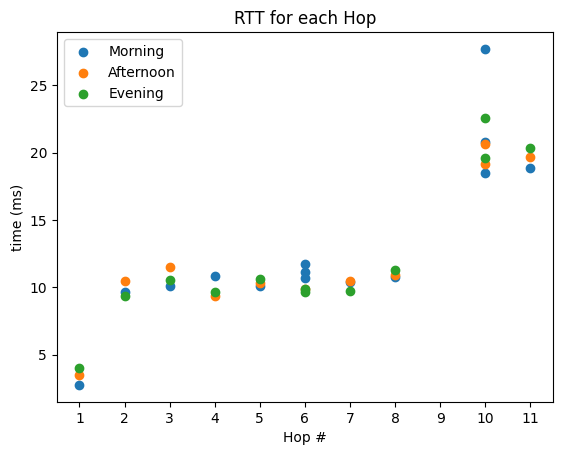

In [7]:
dirname = 'April_3/trace'
read_csv_dir_trace(dirname)

['ping_mon_aft.csv', 'ping_mon_mor.csv', 'ping_mon_eve.csv']


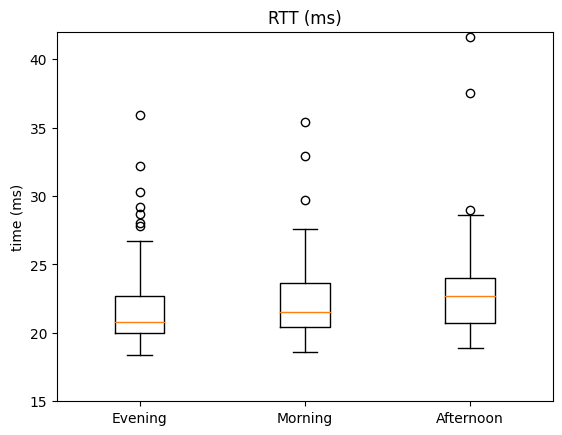

In [8]:
dirname = 'April_3/ping'
times = boxplot_ping_dir(dirname)

# DAY LEVEL COMPARISON PAVIA

['ping_sun_eve.csv', 'ping_sun_mor.csv', 'ping_sun_aft.csv']
['ping_mon_aft.csv', 'ping_mon_mor.csv', 'ping_mon_eve.csv']


Text(0, 0.5, 'RTT (ms)')

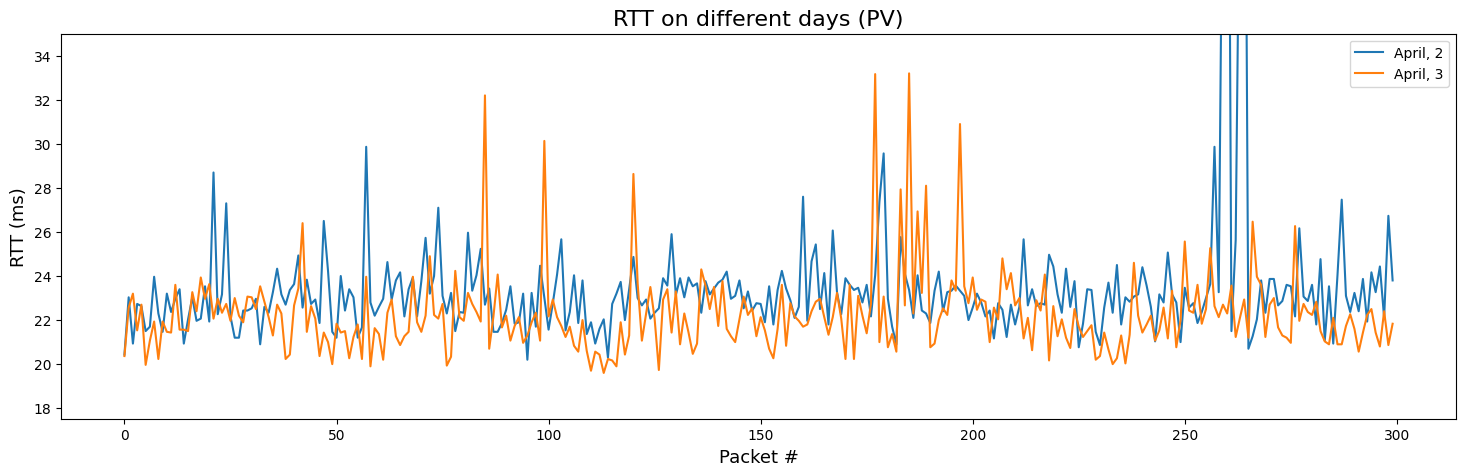

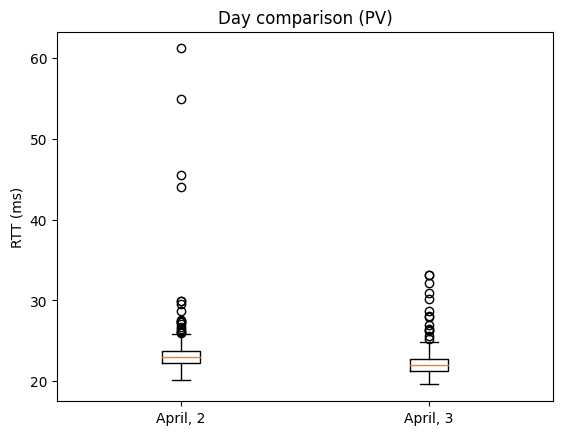

In [65]:
def aggregate_hours(nested_list):
    times_arr = np.array(nested_list).T
    df = pd.DataFrame(data = times_arr, columns = ['A', 'B', 'C'])
    mean = df.mean(axis = 1)
    return mean

#ping
april2_dir_ping = 'April_2/ping'
april3_dir_ping = 'April_3/ping'

hours_2_april_ping, df = read_csv_dir(april2_dir_ping, 300)
hours_3_april_ping, df = read_csv_dir(april3_dir_ping, 300)

day_2_april_ping = aggregate_hours(hours_2_april_ping)
day_3_april_ping = aggregate_hours(hours_3_april_ping)

plt.figure(figsize=(18,5))
plt.plot(day_2_april_ping)
plt.plot(day_3_april_ping)
plt.title('RTT on different days (PV)', fontsize = 16)
plt.xlabel('Packet #', fontsize = 13)
plt.ylabel('RTT (ms)', rotation = 90, fontsize = 13)
plt.legend(['April, 2', 'April, 3'])
plt.ylim(top=35)

plt.figure()
plt.boxplot([day_2_april_ping, day_3_april_ping], labels = ['April, 2', 'April, 3'])
plt.title('Day comparison (PV)')
plt.ylabel('RTT (ms)', rotation = 90)
#plt.ylim(top=34)


# CAFFARO VS PAVIA

['ping_eve_BS.csv', 'ping_mon_eve.csv']
['ping_eve_BS.csv', 'ping_mon_eve.csv']


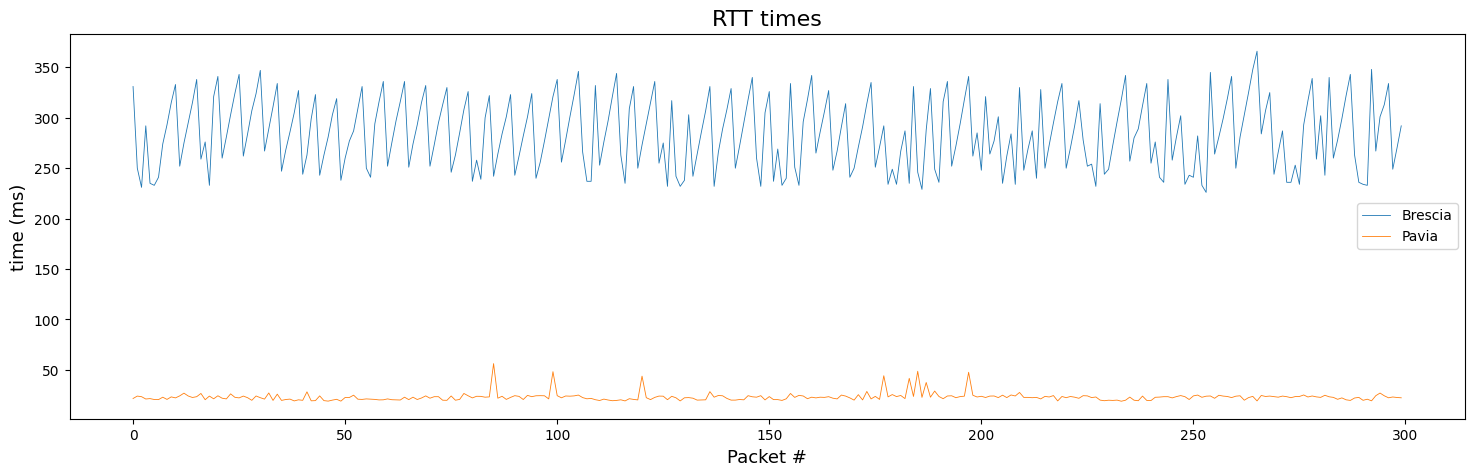

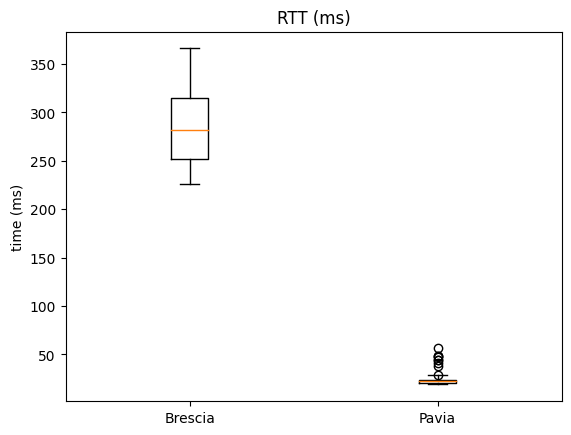

In [68]:
def plot_time(list_time, title):
    plt.figure(figsize=(18,5))
    for time in list_time:
        #print(time)
        plt.plot(time, '-', linewidth = 0.6)  
    plt.legend(['Brescia', 'Pavia'])
    plt.title(title, fontsize = 16)
    plt.xlabel('Packet #', fontsize = 13)
    plt.ylabel('time (ms)', rotation = 90, fontsize = 13)

def boxplot_ping_dir(dirname):
    list_name = os.listdir(dirname)
    if '.DS_Store' in list_name:
        list_name.remove('.DS_Store')
    print(list_name)
    times = pd.DataFrame({})
    for filename in list_name:
        ping = pd.read_csv(dirname+'/'+filename, delimiter = ' ')
        ping = ping.head(300)
        times  = pd.concat([times, ping['RTT(ms)']], axis = 1)
    times = times.astype(float)
    plt.boxplot(times, labels=['Brescia', 'Pavia'])
    plt.title('RTT (ms)')
    plt.ylabel('time (ms)', rotation = 90)


dirname = 'April_5/ping'
number_packets = 300
title = 'RTT times'

list_time, df = read_csv_dir(dirname, number_packets)
plot_time(list_time, title)

    
plt.figure()

dirname = 'April_5/ping'
times = boxplot_ping_dir(dirname)

['trace_eve_BS.csv', 'trace_mon_eve1.csv']


/tmp/ipykernel_4093/3911316068.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  trace = pd.read_csv(dirname+'/'+filename, delimiter = '  ')
/tmp/ipykernel_4093/3911316068.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  packet_time = trace.mean(axis = 1)
/tmp/ipykernel_4093/3911316068.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  trace = pd.read_csv(dirname+'/'+filename, delimiter = '  ')
/tmp/ipykernel_4093/3911316068.py:1

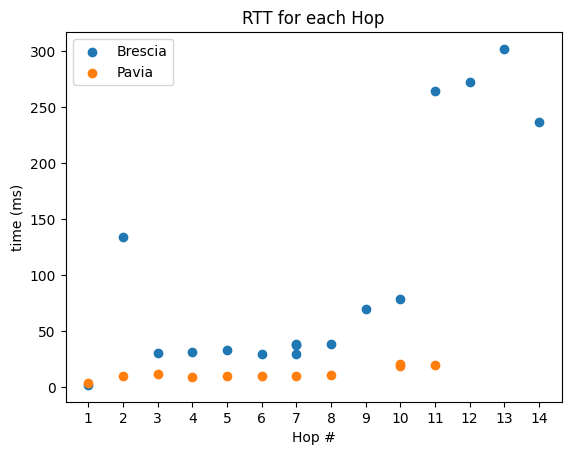

In [11]:
def read_csv_dir_trace(dirname):
    list_name = os.listdir(dirname)
    if '.DS_Store' in list_name:
        list_name.remove('.DS_Store')
    print(list_name)
    #list_name = list_name[1]
    for filename in list_name:
        trace = pd.read_csv(dirname+'/'+filename, delimiter = '  ')
        #trace = trace.head(14)
        cols = trace.columns
        for col in cols[2:]:
            trace[col] = trace[col].astype(float)
        trace[cols[0]] = trace[cols[0]].astype(str)
        packet_time = trace.mean(axis = 1)
        df_new = pd.concat([trace['Hop'], packet_time], axis = 1)  
        plt.scatter(df_new['Hop'], df_new[0])
        plt.title('RTT for each Hop')
        plt.ylabel('time (ms)', rotation = 90)
        plt.xlabel('Hop #')
        plt.legend(['Brescia', 'Pavia'])

dirname = 'April_5/trace'
read_csv_dir_trace(dirname)

In [59]:
mtr = pd.read_csv('April_5/mtr/mtr_BS.csv', delimiter='  ')
del mtr['Empty']
mtr

/tmp/ipykernel_4093/3567178340.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  mtr = pd.read_csv('April_5/mtr/mtr_BS.csv', delimiter='  ')


,Hop,IP,Loss%,Snt,Last,Avg,Best,Wrst,StDev
0,1,192.168.1.1,0.0%,100,2.3,2.7,1.7,8.4,0.8
1,2,172.16.142.129,0.0%,100,58.3,70.5,29.0,243.2,65.3
2,3,172.16.142.44,0.0%,100,47.1,35.5,24.9,167.0,11.5
3,4,172.16.14.52,0.0%,100,26.6,31.8,25.5,91.3,7.3
4,5,151.6.92.115,0.0%,100,34.1,34.5,25.5,70.0,8.7
5,6,151.6.92.34,0.0%,100,29.6,33.1,26.1,65.8,7.1
6,7,rmid-t02-miot-t02-po01.wind.it,0.0%,100,35.1,31.9,25.7,55.6,5.5
7,8,151.6.7.239,0.0%,100,31.0,32.3,25.5,54.3,4.7
8,9,(80.81.193.228)decix-frankfurt.liquidtelecom.net,0.0%,100,51.8,59.6,51.6,119.5,12.1
9,10,(5.11.12.30)hu-0-0-0-2.lfr-p1-mrs.liquidteleco...,0.0%,100,65.8,67.7,61.6,85.9,5.3


Text(0.5, 1.0, 'RTT Standard Deviation for each hop')

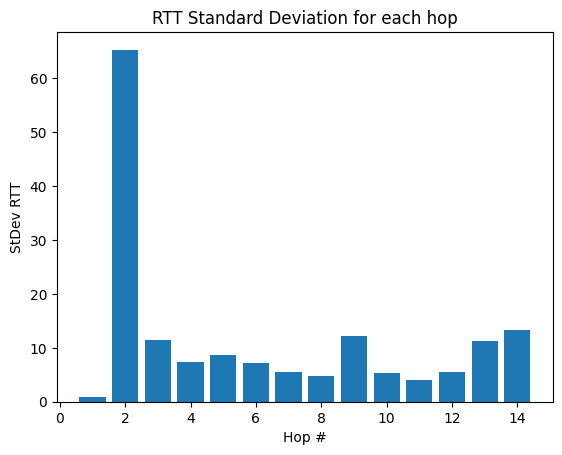

In [56]:
plt.bar(mtr['Hop'], mtr['StDev'])
plt.xlabel('Hop #')
plt.ylabel('StDev RTT', rotation = 90)
plt.title('RTT Standard Deviation for each hop')